<a href="https://colab.research.google.com/github/SarahSchilling618/project-4/blob/mikenurthen/Continuationv2_RandomForest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
from sqlalchemy import create_engine
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.ensemble import RandomForestClassifier

In [2]:
# Read in the cleaned csv file from PostgreSQL_OneHotEncoder_v1.ipynb Colab Notebook

dementia_df = pd.read_csv("/content/drive/MyDrive/Bootcamp/dementia_OHC_v1.csv")
dementia_df

,diabetic,alcohollevel,heartrate,bloodoxygenlevel,bodytemperature,weight,mri_delay,age,cognitive_test_scores,dementia,...,medication_history_Yes,nutrition_diet_Balanced Diet,nutrition_diet_Low-Carb Diet,nutrition_diet_Mediterranean Diet,sleep_quality_Good,sleep_quality_Poor,chronic_health_conditions_Diabetes,chronic_health_conditions_Heart Disease,chronic_health_conditions_Hypertension,chronic_health_conditions_None
0,1,0.084974,98,96.230743,36.224852,57.563978,36.421028,60,10,0,...,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
1,0,0.016973,78,93.032122,36.183874,56.832335,31.157633,61,1,1,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
2,0,0.009000,89,93.566504,37.326321,59.759066,37.640435,69,8,0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
3,0,0.086437,60,93.906510,37.030620,58.266471,50.673992,78,5,1,...,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4,1,0.150747,67,97.508994,36.062121,67.705027,27.810601,77,0,1,...,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1,0.081825,87,93.851963,36.495134,50.380106,42.318663,88,5,1,...,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
996,1,0.145249,97,94.522391,36.270804,94.006484,52.812568,80,9,0,...,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
997,1,0.073692,65,98.578388,37.065703,80.088613,13.640229,67,8,0,...,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
998,0,0.037347,71,91.298580,37.037202,95.322210,17.445715,62,2,1,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


In [3]:
dementia_df.columns

Index(['diabetic', 'alcohollevel', 'heartrate', 'bloodoxygenlevel',
       'bodytemperature', 'weight', 'mri_delay', 'age',
       'cognitive_test_scores', 'dementia', 'education_level_Diploma/Degree',
       'education_level_No School', 'education_level_Primary School',
       'education_level_Secondary School', 'dominant_hand_Left',
       'dominant_hand_Right', 'gender_Female', 'gender_Male',
       'family_history_No', 'family_history_Yes',
       'smoking_status_Current Smoker', 'smoking_status_Former Smoker',
       'smoking_status_Never Smoked', 'apoe_4_Negative', 'apoe_4_Positive',
       'physical_activity_Mild Activity',
       'physical_activity_Moderate Activity', 'physical_activity_Sedentary',
       'depression_status_No', 'depression_status_Yes',
       'medication_history_No', 'medication_history_Yes',
       'nutrition_diet_Balanced Diet', 'nutrition_diet_Low-Carb Diet',
       'nutrition_diet_Mediterranean Diet', 'sleep_quality_Good',
       'sleep_quality_Poor', 'chr

In [4]:
# Refs: Module 20/Day2/Act05-Ins_Random_Forest

# Drop features (columns) from the result of running Random Forest Classifier in Continuationv1_RandomForest.ipynb
# Define the features set

X = dementia_df.copy()
X.drop(["dementia", "depression_status_No", "apoe_4_Negative"], axis=1, inplace=True)

In [5]:
# Preview the features data
X.head()

,diabetic,alcohollevel,heartrate,bloodoxygenlevel,bodytemperature,weight,mri_delay,age,cognitive_test_scores,education_level_Diploma/Degree,...,medication_history_Yes,nutrition_diet_Balanced Diet,nutrition_diet_Low-Carb Diet,nutrition_diet_Mediterranean Diet,sleep_quality_Good,sleep_quality_Poor,chronic_health_conditions_Diabetes,chronic_health_conditions_Heart Disease,chronic_health_conditions_Hypertension,chronic_health_conditions_None
0,1,0.084974,98,96.230743,36.224852,57.563978,36.421028,60,10,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
1,0,0.016973,78,93.032122,36.183874,56.832335,31.157633,61,1,0.0,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
2,0,0.009000,89,93.566504,37.326321,59.759066,37.640435,69,8,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
3,0,0.086437,60,93.906510,37.030620,58.266471,50.673992,78,5,0.0,...,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4,1,0.150747,67,97.508994,36.062121,67.705027,27.810601,77,0,0.0,...,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0


In [6]:
# Define target vector

y = dementia_df["dementia"].values.reshape(-1,1)
y[:5]

array([[0],
       [1],
       [0],
       [1],
       [1]])

In [7]:
# Split the dataset using train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, stratify=y)

In [8]:
# Creating StandardScaler instance
scaler = StandardScaler()

# Fit the training data to the standard scaler
X_scaler = scaler.fit(X_train)

# Transform the training data using the scaler
X_train_scaled = X_scaler.transform(X_train)

# Transform the testing data using the scaler
X_test_scaled = X_scaler.transform(X_test)

In [9]:
# Fitting the Random Forest Model
## Create the random forest classifier instance
rf_model = RandomForestClassifier(n_estimators=500, random_state=78)


In [10]:
# Fit the model and use .ravel()on the "y_train" data.
rf_model = rf_model.fit(X_train_scaled, y_train.ravel())

In [11]:
# Making Predictions Using the Random Forest Model
predictions = rf_model.predict(X_test_scaled)

In [12]:
# Calculating the confusion matrix
cm = confusion_matrix(y_test, predictions)
cm_df = pd.DataFrame(
    cm, index=["Actual 0", "Actual 1"], columns=["Predicted 0", "Predicted 1"]
)

# Calculating the accuracy score
acc_score = accuracy_score(y_test, predictions)


In [13]:
# Displaying results
print("Confusion Matrix")
display(cm_df)
print(f"Accuracy Score : {acc_score}")
print("Classification Report")
print(classification_report(y_test, predictions))

Confusion Matrix


,Predicted 0,Predicted 1
Actual 0,129,0
Actual 1,0,121


Accuracy Score : 1.0
Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       129
           1       1.00      1.00      1.00       121

    accuracy                           1.00       250
   macro avg       1.00      1.00      1.00       250
weighted avg       1.00      1.00      1.00       250



In [14]:
# Get the feature importance array
importances = rf_model.feature_importances_
# List the top 10 most important features
importances_sorted = sorted(zip(rf_model.feature_importances_, X.columns), reverse=True)
importances_sorted[:10]

[(0.6072928735272235, 'cognitive_test_scores'),
 (0.12798996211987662, 'depression_status_Yes'),
 (0.05389098823144826, 'apoe_4_Positive'),
 (0.022122236576686428, 'smoking_status_Current Smoker'),
 (0.01898371021284606, 'weight'),
 (0.018351934424844528, 'bodytemperature'),
 (0.01790920424519686, 'bloodoxygenlevel'),
 (0.01688078212153218, 'alcohollevel'),
 (0.01668614395587432, 'mri_delay'),
 (0.01600998687907947, 'age')]

<Axes: title={'center': 'Feature Importance'}, xlabel='1'>

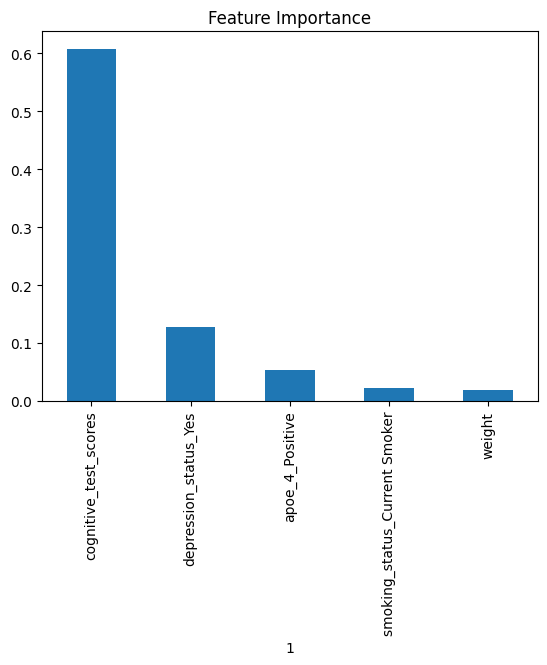

In [15]:
# Visualize the features by importance
importances_df = pd.DataFrame(sorted(zip(rf_model.feature_importances_, X.columns), reverse=True))
importances_df.set_index(importances_df[1], inplace=True)
importances_df.drop(columns=1, inplace=True)
importances_df.rename(columns={0: 'Feature Importance'}, inplace=True)
# importances_df[0:5]
importances_df[0:5].plot.bar(title='Feature Importance', legend=False)
